# Introduction to Inversion 

## RMS and Inverval velocity 

The RMS velocity is related to the interval velocity via 

$$V^2_{rms}(t_j) = \frac{1}{t_j} \int_0^{t_{max}} v^2_{int}(u) du$$

where 
- $v_{int}$ is the interval velocity 
- $V^2_{rms}$ is the RMS velocity 
- $H$ is the heavyside step function 
- $t$ is time

The analytic inverse is given by 

$$v_{int} = V_{rms}(t) \left(1 + \frac{2 t V'_{rms}(t)}{V_{rms}(t)}\right)^{1/2}$$

In order to work with these equations, we will pick a function for $v_{int}$ that we can integrate: 

$$v_{int} = v_0 + a \sin(2\pi f t)$$
$$\quad = v_0 + a \sin(\omega t)$$

## Goals
- figure out what $V_{rms}$ (can use sympy or Wolfram Alpha) 
- use finite differences to recover $v_{int}$ from $V_{rms}$ 
- explore principles of non-uniqueness for this problem 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def interval_velocity_analytic(t, v0, a, omega):
    return v0 + a * np.sin(omega*t) 

In [37]:
v0 = 2000 
a = 50
f = 2
omega = 2 * np.pi *f

In [12]:
n_times = 200 
tmax = 2

t = np.linspace(0, tmax, n_times) 

In [13]:
vint_analytic = interval_velocity_analytic(t, v0, a, omega)

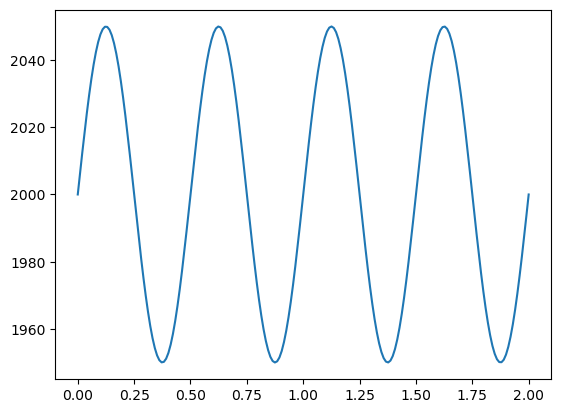

In [14]:
plt.plot(t, vint_analytic)

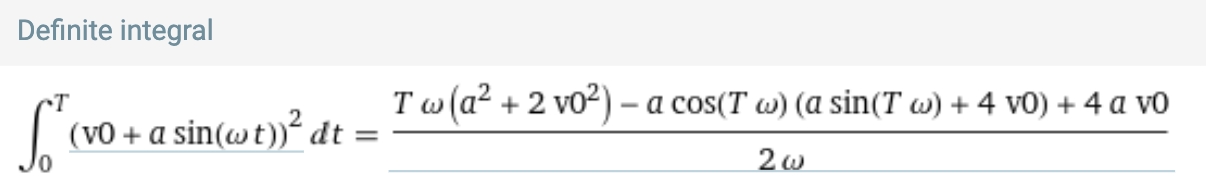

In [27]:
def rms_velocity_analytic(t, v0, a, omega):
    
    inds_nonzero = t > 0 # in general a small number 
    
    vrms = np.zeros_like(t)  # np.zeros(len(t))
    
    vrms[inds_nonzero] = np.sqrt((
        omega * (a**2 + 2 * v0**2)
        - a / t[inds_nonzero] * np.cos(omega * t[inds_nonzero]) * (a * np.sin(omega*t[inds_nonzero]) + 4 * v0)
        + 4 * a / t[inds_nonzero] * v0
    ) / (2 * omega))
    
    vrms[~inds_nonzero] = v0
    
    return vrms

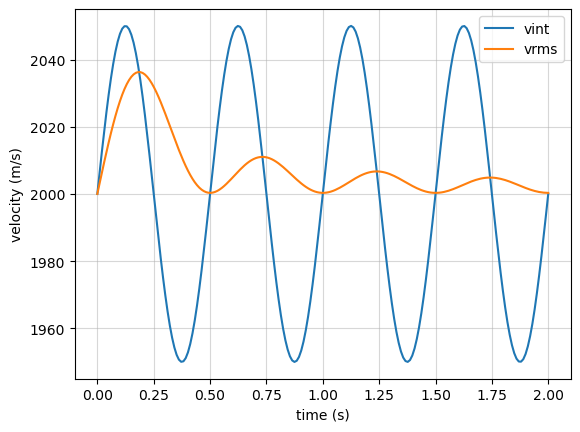

In [33]:
fig, ax = plt.subplots(1, 1) 

vrms = rms_velocity_analytic(t, v0, a, omega)

ax.plot(t, vint_analytic, label="vint")
ax.plot(t, vrms, label="vrms")
ax.legend()
ax.set_xlabel("time (s)")
ax.set_ylabel("velocity (m/s)")
ax.grid(alpha=0.5)

In [35]:
# a = np.r_[0, 1, 3]
# np.diff(a) 

array([1, 2])

In [41]:
vrms = rms_velocity_analytic(t, v0, a, omega)

dt = np.diff(t)
dv = np.diff(vrms)

dv_dt = dv / dt
dv_dt = np.r_[0, dv_dt]

In [42]:
vrms.shape

(200,)

In [43]:
dv_dt.shape

(200,)

In [45]:
vint_rec = vrms * (1 + (2*t*dv_dt)/vrms)**0.5

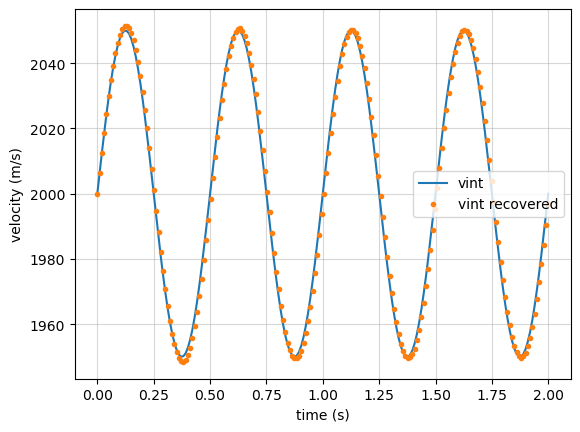

In [46]:
fig, ax = plt.subplots(1, 1) 


ax.plot(t, vint_analytic, label="vint")
ax.plot(t, vint_rec, ".", label="vint recovered")
ax.legend()
ax.set_xlabel("time (s)")
ax.set_ylabel("velocity (m/s)")
ax.grid(alpha=0.5)